In [1]:
import pandas as pd
from scripts import tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_completeness()
#kb__ = kb.get_kb_impact_completeness()
#tt.training_testing_completeness()

abalone: 0.6046409964435673
abalone: 0.6010158738722485
abalone: 0.6011594040479842
abalone: 0.5978559877935347
abalone: 0.6045007912871799
abalone: 0.6031662640767531
abalone: 0.6023569503222231
abalone: 0.6024829920264335
abalone: 0.6011319398186054
abalone: 0.5880585436007926
abalone: 0.5485682223554627
abalone: 0.5494882196372771
abalone: 0.5556874157627225
abalone: 0.5550186243155286
abalone: 0.5470099089595695
abalone: 0.5464264644176892
abalone: 0.549634832745269
abalone: 0.5472859846399623
abalone: 0.600682445278963
abalone: 0.603113428156302
abalone: 0.6050798725910259
abalone: 0.601101602905646
abalone: 0.6046929940668395
abalone: 0.6045439639803258
abalone: 0.604690855389278
abalone: 0.6043668510858995
abalone: 0.6042638147607012
abalone: 0.6095598175700948
abalone: 0.6073399278175904
abalone: 0.6087664606703068
abalone: 0.6043326875335077
abalone: 0.6095057296854001
abalone: 0.6094944815523982
abalone: 0.6088019437881648
abalone: 0.6081436588795972
abalone: 0.60808866286801

In [14]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [15]:
data = pd.read_csv("../results/prediction_completeness.csv")
data


,dataset,model,technique,rmse
0,abalone,DecisionTree,impute_standard,0.604641
1,abalone,DecisionTree,impute_mean,0.601016
2,abalone,DecisionTree,impute_median,0.601159
3,abalone,DecisionTree,impute_random,0.597856
4,abalone,DecisionTree,impute_knn,0.604501
...,...,...,...,...
1183,wall-robot-navigation,SVC,impute_knn,0.146261
1184,wall-robot-navigation,SVC,impute_mice,0.114107
1185,wall-robot-navigation,SVC,impute_linear_regression,0.117769
1186,wall-robot-navigation,SVC,impute_random_forest,0.145459


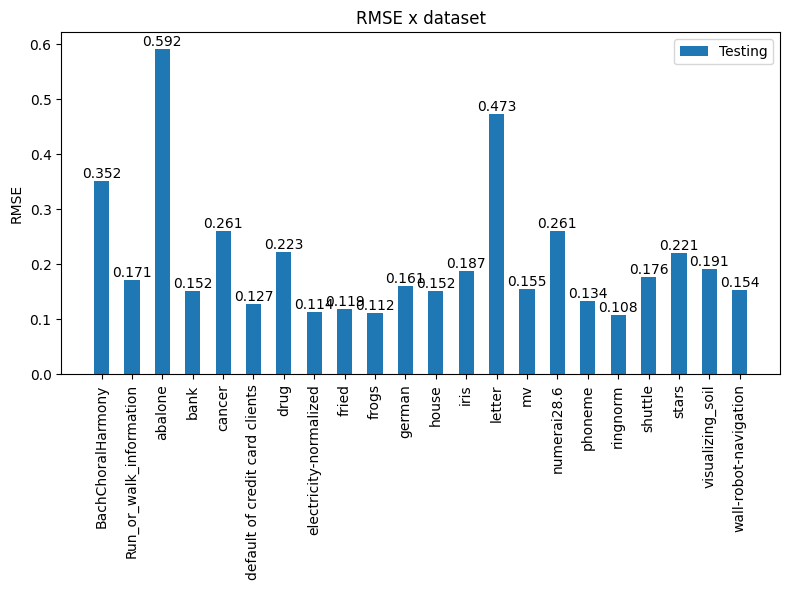

In [16]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

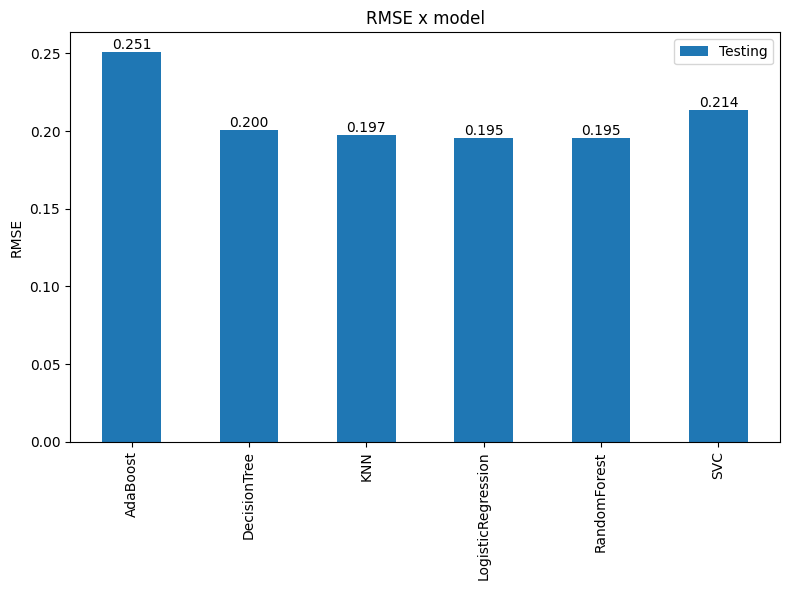

In [17]:
### performance per modello
df = data[['model','rmse']].groupby(['model']).mean().reset_index().copy()
bar_plot("RMSE x model",df.model.unique(),df.rmse)


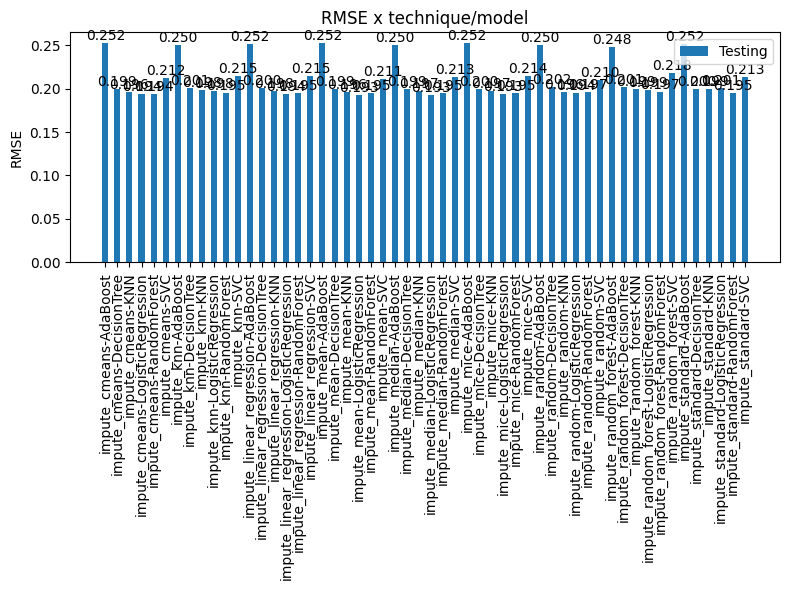

In [18]:
### performance per technique e modello
labels = []
for technique in np.sort(data.technique.unique()):
    for model in np.sort(data.model.unique()):
        labels.append(technique+"-"+model)

df = data[['technique','model','rmse']].groupby(['technique','model']).mean().reset_index().copy()
bar_plot("RMSE x technique/model",labels,df.rmse)

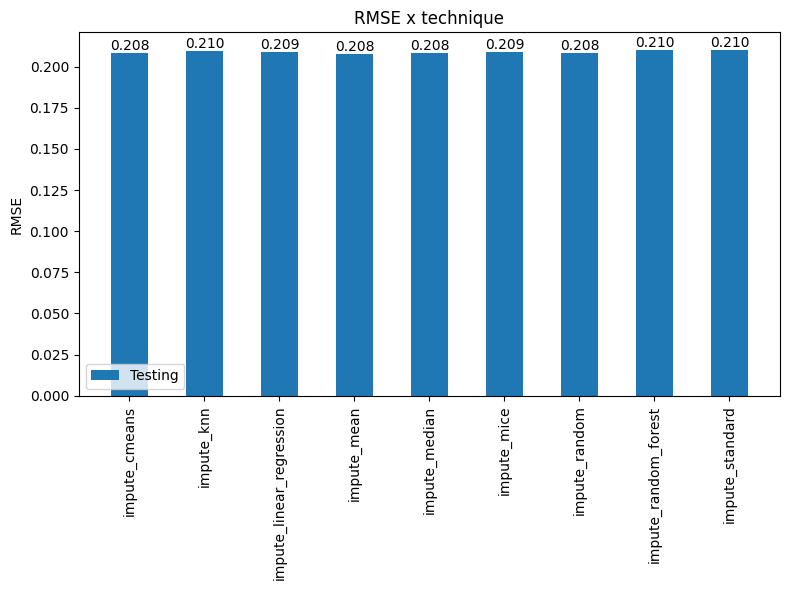

In [19]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [20]:
len(data[data.rmse < 0.10])/len(data)

0.11363636363636363

In [21]:
len(data[data.rmse < 0.15])/len(data)

0.398989898989899

In [22]:
len(data[data.rmse < 0.20])/len(data)

0.6161616161616161

In [23]:
len(data[data.rmse < 0.30])/len(data)

0.8518518518518519

In [24]:
data.rmse.mean()

np.float64(0.20886694731596211)

In [25]:
data.rmse.median()

np.float64(0.16776067646858023)